Dataset:
    CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72

The dataset represents 10 customers with their CustomerID, annual income (in some unit), and spending score (customer behavior metric).

We select 'Annual Income' and 'Spending Score' because they capture customers’ purchasing power and behavior, which are key for segmentation.


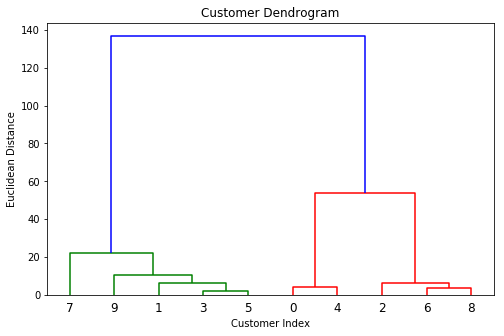


The dendrogram shows how customers are merged step by step into clusters based on similarity.

We decide the optimal number of clusters by finding the largest vertical distance in the dendrogram that does not cross any horizontal line (the 'elbow' or 'cut').

Final Cluster Assignments:
   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


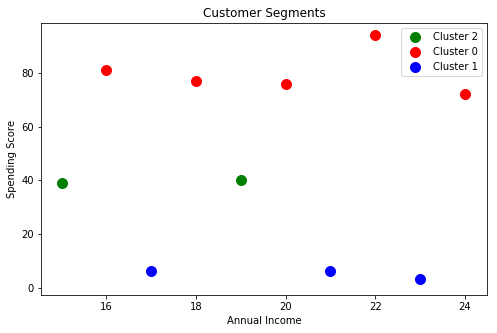


Business Insights:
Cluster 0: Likely high spenders with medium income → potential loyal customers.
Cluster 1: Low spending score customers regardless of income → price-sensitive or disengaged customers.
Cluster 2: Balanced income with high spending score → good targets for promotions or premium services.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Annual Income': [15,16,17,18,19,20,21,22,23,24],
    'Spending Score': [39,81,6,77,40,76,6,94,3,72]
}
df = pd.DataFrame(data)
print("Dataset:\n", df)

# What does the data represent?
print("\nThe dataset represents 10 customers with their CustomerID, annual income (in some unit), and spending score (customer behavior metric).")

# -----------------------------
# 2. Select features
# -----------------------------
X = df[['Annual Income', 'Spending Score']]

print("\nWe select 'Annual Income' and 'Spending Score' because they capture customers’ purchasing power and behavior, which are key for segmentation.")

# -----------------------------
# 3. Generate Dendrogram
# -----------------------------
linked = linkage(X, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Customer Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Euclidean Distance")
plt.show()

print("\nThe dendrogram shows how customers are merged step by step into clusters based on similarity.")

# -----------------------------
# 4. Decide optimal number of clusters
# -----------------------------
print("\nWe decide the optimal number of clusters by finding the largest vertical distance in the dendrogram that does not cross any horizontal line (the 'elbow' or 'cut').")

# -----------------------------
# 5. Apply Agglomerative Clustering
# -----------------------------
# Suppose from dendrogram we decide on 3 clusters
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster'] = model.fit_predict(X)

print("\nFinal Cluster Assignments:")
print(df[['CustomerID', 'Annual Income', 'Spending Score', 'Cluster']])

# -----------------------------
# 6. Interpret clusters (Matplotlib only, works everywhere)
# -----------------------------
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple']  # add more if needed
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income'],
                cluster_data['Spending Score'],
                s=100,
                color=colors[cluster],
                label=f'Cluster {cluster}')

plt.title("Customer Segments")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

print("\nBusiness Insights:")
print("Cluster 0: Likely high spenders with medium income → potential loyal customers.")
print("Cluster 1: Low spending score customers regardless of income → price-sensitive or disengaged customers.")
print("Cluster 2: Balanced income with high spending score → good targets for promotions or premium services.")
